# Genes X Disorder

In [1]:
import pandas as pd

genes_df = pd.read_excel('.\Genes_Disorder\Disorder_Genes.xlsx', index_col=None)
genes_df.dtypes

Disorder_id                              int64
OrphaCode                                int64
Disorder_name                           object
Disorder_id_2                            int64
Disorder_type                           object
Disorder_type_id                         int64
Disorder_group                          object
Disorder_group_id                        int64
Gene_name                               object
Gene_symbol                             object
Gene_id                                  int64
Gene_type                               object
Gene_type_id                             int64
Gene_locus                              object
Gene_locus_id                          float64
Disorder_gene_association               object
Disorder_gene_association_id             int64
Disorder_gene_association_status        object
Disorder_gene_association_status_id      int64
dtype: object

## Here you can find the COUNT for several categories

In [2]:
genes_df.Disorder_type.value_counts()

Disease                                                   2312
Malformation syndrome                                      746
Clinical subtype                                           506
Etiological subtype                                        148
Morphological anomaly                                       93
Histopathological subtype                                   23
Biological anomaly                                          10
Clinical syndrome                                            6
Clinical group                                               5
Particular clinical situation in a disease or syndrome       3
Category                                                     1
Name: Disorder_type, dtype: int64

In [3]:
genes_df.Disorder_group.value_counts()

Disorder               3170
Subtype of disorder     677
Group of disorders        6
Name: Disorder_group, dtype: int64

In [4]:
genes_df.Gene_name.value_counts()

collagen type II alpha 1 chain                            18
hemoglobin subunit beta                                   17
KIT proto-oncogene, receptor tyrosine kinase              13
lamin A/C                                                 13
fibroblast growth factor receptor 3                       11
                                                          ..
S-phase cyclin A associated protein in the ER              1
serum amyloid A1                                           1
nucleolar protein 3                                        1
phosphatidylinositol-4-phosphate 5-kinase type 1 gamma     1
pterin-4 alpha-carbinolamine dehydratase 1                 1
Name: Gene_name, Length: 2519, dtype: int64

In [5]:
genes_df.Gene_symbol.value_counts()

COL2A1     18
HBB        17
LMNA       13
KIT        13
VANGL2     11
           ..
CHST14      1
SNRPB       1
CYP26C1     1
RAB7A       1
AP4M1       1
Name: Gene_symbol, Length: 2519, dtype: int64

In [6]:
genes_df.Gene_type.value_counts()

gene with protein product    3799
Non-coding RNA                 30
Disorder-associated locus      24
Name: Gene_type, dtype: int64

In [7]:
genes_df.Gene_locus.value_counts()

Xq28             63
16p13.3          36
3p21.31          32
11p15.4          30
17q21.31         30
                 ..
2q22.1            1
5q11.2-q12.1      1
18q12.1-q12.2     1
10q26.3           1
13q21.33          1
Name: Gene_locus, Length: 758, dtype: int64

## Genes responsible of rare diseases

In [8]:
Genes_count = pd.DataFrame(genes_df.Gene_symbol.value_counts())
top_30_genes = Genes_count.head(30)
top_30_genes.reset_index(inplace=True)
top_30_genes = top_30_genes.rename(columns = {'index':'Gene','Gene_symbol':'count' })
top_30_genes.dtypes

Gene     object
count     int64
dtype: object

The count is the number of diseases associated to the genes

In [9]:
top_30_genes

,Gene,count
0,COL2A1,18
1,HBB,17
2,LMNA,13
3,KIT,13
4,VANGL2,11
5,FGFR3,11
6,PTEN,10
7,GNAS,10
8,TRPV4,10
9,FGFR1,10


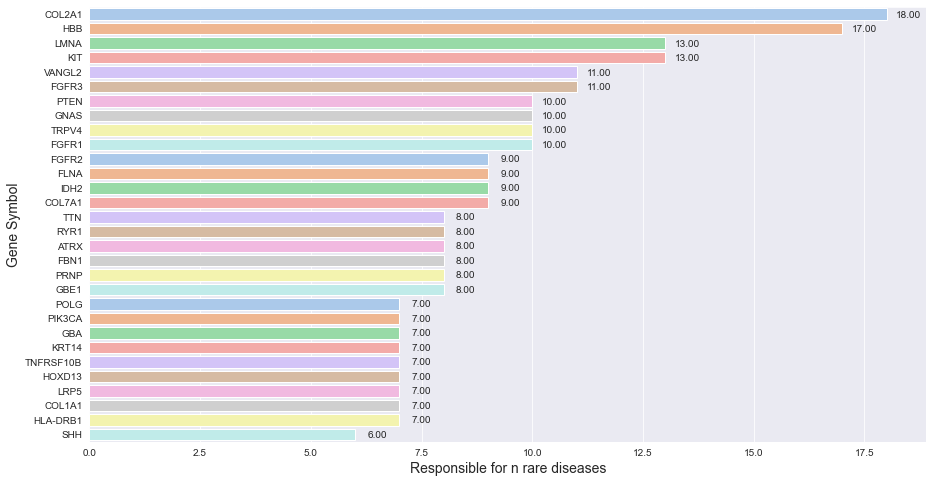

In [45]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
    
from matplotlib import pyplot


# a4_dims = (11.7, 8.27)
# fig, ax = pyplot.subplots(figsize=a4_dims)    
plt.figure(figsize=(15,8))

sns.set_style('darkgrid')

g = sns.barplot(x = "count", y = "Gene", data = top_30_genes, palette = 'pastel')

for p in g.patches:
    width = p.get_width()
    plt.text(0.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.xlabel("Responsible for n rare diseases", size=14)
plt.ylabel("Gene Symbol", size=14) 

plt.show()

### Locus and rare diseases. What Genelocus is responsible for multiple rare diseases?

In [28]:
GLocus_count = pd.DataFrame(genes_df.Gene_locus.value_counts())
top_30_locus = GLocus_count.head(30)
top_30_locus.reset_index(inplace=True)
top_30_locus = top_30_locus.rename(columns = {'index':'GeneLocus','Gene_locus':'count' })
top_30_locus.dtypes

GeneLocus    object
count         int64
dtype: object

The count is the number of diseases these locus are responsible

In [29]:
top_30_locus

,GeneLocus,count
0,Xq28,63
1,16p13.3,36
2,3p21.31,32
3,11p15.4,30
4,17q21.31,30
5,19p13.2,29
6,19q13.2,28
7,1q22,27
8,17q21.2,27
9,15q26.1,26


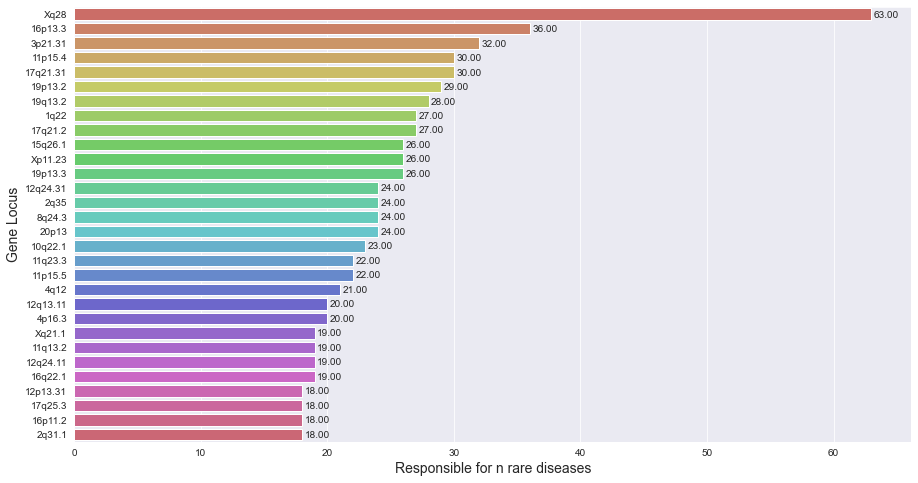

In [46]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
    
from matplotlib import pyplot


# a4_dims = (11.7, 8.27)
# fig, ax = pyplot.subplots(figsize=a4_dims)    
plt.figure(figsize=(15,8))

sns.set_style('darkgrid')

h = sns.barplot(x = "count", y = "GeneLocus", data = top_30_locus, palette = 'hls')
for p in h.patches:
    width = p.get_width()
    plt.text(1.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.xlabel("Responsible for n rare diseases", size=14)
plt.ylabel("Gene Locus", size=14)

plt.show()

## Analyzing the Disease 
#### ALS

df_disease contains all the info we want. We just need to filter it with the disease code

In [2]:
df_disease = genes_df[['Disorder_id_2', 'Disorder_name', 'Disorder_type', 'Disorder_group', 'Gene_name',
                       'Gene_symbol', 'Gene_locus', 'Disorder_gene_association', 
                       'Disorder_gene_association_status']]
df_disease

,Disorder_id_2,Disorder_name,Disorder_type,Disorder_group,Gene_name,Gene_symbol,Gene_locus,Disorder_gene_association,Disorder_gene_association_status
0,17601,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Disorder,kinesin family member 7,KIF7,15q26.1,Disease-causing germline mutation(s) in,Assessed
1,5,Aspartylglucosaminuria,Disease,Disorder,aspartylglucosaminidase,AGA,4q34.3,Disease-causing germline mutation(s) in,Assessed
2,17604,Brachydactyly-short stature-retinitis pigmento...,Malformation syndrome,Disorder,CWC27 spliceosome associated protein homolog,CWC27,NaN,Disease-causing germline mutation(s) in,Assessed
3,6,Multiple sulfatase deficiency,Disease,Disorder,sulfatase modifying factor 1,SUMF1,3p26.1,Disease-causing germline mutation(s) in,Assessed
4,7,Beta-mannosidosis,Disease,Disorder,mannosidase beta,MANBA,4q24,Disease-causing germline mutation(s) in,Assessed
...,...,...,...,...,...,...,...,...,...
3848,14383,Familial porencephaly,Etiological subtype,Subtype of disorder,collagen type IV alpha 1 chain,COL4A1,13q34,Disease-causing germline mutation(s) in,Assessed
3849,14362,Dentin dysplasia type I,Clinical subtype,Subtype of disorder,ssu-2 homolog,SSUH2,3p25.3,Disease-causing germline mutation(s) in,Assessed
3850,14364,Dentin dysplasia type II,Clinical subtype,Subtype of disorder,dentin sialophosphoprotein,DSPP,4q22.1,Disease-causing germline mutation(s) in,Assessed
3851,14345,Cleft velum,Morphological anomaly,Disorder,grainyhead like transcription factor 3,GRHL3,1p36.11,Major susceptibility factor in,Assessed


In [3]:
df_disease[df_disease['Disorder_id_2'] == 106]

,Disorder_id_2,Disorder_name,Disorder_type,Disorder_group,Gene_name,Gene_symbol,Gene_locus,Disorder_gene_association,Disorder_gene_association_status
67,106,Amyotrophic lateral sclerosis,Disease,Disorder,cyclin F,CCNF,16p13.3,Disease-causing germline mutation(s) in,Assessed
